In [2]:
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy
from functions import *
import networkx as nx
from matplotlib.pyplot import figure, text
from matplotlib import gridspec
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection
from matplotlib import cm
import os
import datetime

#Building the neural network
from sklearn.preprocessing import LabelEncoder, OneHotEncoder,StandardScaler
from sklearn.model_selection import train_test_split,cross_val_score,cross_val_predict
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.manifold import TSNE
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn import metrics
from sklearn.mixture import GaussianMixture
import seaborn as sns
import re
from collections import defaultdict
from geopy.geocoders import Nominatim
from community import community_louvain
import sys
import csv
import pandas
import random
from tempfile import TemporaryFile

In [3]:
from mpl_toolkits.basemap import Basemap


In [4]:
from collections import defaultdict


In [5]:
import country_converter as coco


# Read the saved dataframe with month column

In [155]:
df_date=pd.read_csv('data/df_date.csv')  


In [156]:
months=sorted(list(set([i[:7] for i in list(df_date['Date'])])))
months

['2019-12',
 '2020-01',
 '2020-02',
 '2020-03',
 '2020-04',
 '2020-05',
 '2020-06',
 '2020-07',
 '2020-08',
 '2020-09',
 '2020-10',
 '2020-11',
 '2020-12',
 '2021-01',
 '2021-02',
 '2021-03',
 '2021-04',
 '2021-05']

In [158]:
start=7
start_month=months[start]
start_month
end_month=months[-1]
df_date=df_date[df_date["Month"] >=start]

print('start_month',start_month)
print('end_month',end_month)


start_month 2020-07
end_month 2021-05


In [159]:

def filter_df(data_frame,column, threshold):
    return data_frame[data_frame[column].isin(data_frame[column].value_counts()[data_frame[column].value_counts()>threshold].index)]





In [160]:
def filter_df_samplelarge(data_frame,column, threshold_max,threshold_min):
    #SELECT THRESHOLD_MIN<COLUMN COUNT<THRESHOLD_MAX
    data_filter=data_frame[data_frame[column].isin(data_frame[column].value_counts()[data_frame[column].value_counts()>threshold_min].index)]
    data_filter=data_filter[data_filter[column].isin(data_filter[column].value_counts()[data_filter[column].value_counts()<threshold_max].index)]
    frames=[data_filter]
    
    for col in list(data_frame[column].value_counts()[data_frame[column].value_counts()>threshold_max].index):
        data_frame_c_=data_frame[data_frame[column]==col].groupby(column).apply (lambda x: x.sample(n=threshold_max,random_state=1))
        data_frame_c=data_frame_c_.reset_index(drop=True)
        frames.append(data_frame_c)
        
    df_processed=pd.concat(frames)
    
    return df_processed.reset_index(drop=True)




# function to convert sequence strings into k-mer words, default size = 6 (hexamer words)

def get_metrics(y_test, y_predicted):
    accuracy = accuracy_score(y_test, y_predicted)
    precision = precision_score(y_test, y_predicted, average='weighted')
    recall = recall_score(y_test, y_predicted, average='weighted')
    f1 = f1_score(y_test, y_predicted, average='weighted')
    return accuracy, precision, recall, f1



def convert_sparse_matrix_to_sparse_tensor(X):
    coo = X.tocoo()
    indices = np.mat([coo.row, coo.col]).transpose()
    return tf.SparseTensor(indices, coo.data, coo.shape)


def leave_one_out(df,column,region_i):
    return df[df[column]!=region_i].reset_index(drop=True),df[df[column]==region_i].reset_index(drop=True)



        

# Change the month_i variable and centroid country here
# Dont need leave_one_out here, just do binary classification

In [ ]:



n_top=40
region_count  = df_date_i['region'].value_counts()
region_count = region_count[:n_top,]
plt.figure(figsize=(20,5))
sns.barplot(x=region_count.index, y=region_count.values, alpha=0.8)
plt.title('Covid genome sequences top %d occurence by region'%n_top)
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Region', fontsize=12)
plt.show()

In [ ]:
df_date_i['region'].value_counts()[:60]

In [268]:
# evenly select sample_size number of genome sequences from each region


threshold=300  
sample_size=300


df_filtered=filter_df(df_date_i,'region', threshold)
df_even_=df_filtered.groupby("region").apply (lambda x: x.sample(n=sample_size,random_state=1))
df_even=df_even_.reset_index(drop=True)
len(list(set(df_even['region'])))


49

In [269]:
set(df_even['region'])

{'Australia',
 'Austria',
 'Bangladesh',
 'Belgium',
 'Brazil',
 'Canada',
 'Chile',
 'CzechRepublic',
 'DRC',
 'Denmark',
 'Egypt',
 'England',
 'Finland',
 'France',
 'Gambia',
 'Germany',
 'HongKong',
 'Iceland',
 'India',
 'Indonesia',
 'Ireland',
 'Israel',
 'Italy',
 'Japan',
 'Jordan',
 'Kenya',
 'Lithuania',
 'Luxembourg',
 'Mayotte',
 'Mexico',
 'Netherlands',
 'NewZealand',
 'NorthernIreland',
 'Norway',
 'Poland',
 'Portugal',
 'Russia',
 'SaudiArabia',
 'Scotland',
 'Singapore',
 'SouthAfrica',
 'SouthKorea',
 'Spain',
 'Sweden',
 'Switzerland',
 'Turkey',
 'USA',
 'UnitedArabEmirates',
 'Wales'}

In [ ]:



n_top=40
region_count  = df_even['region'].value_counts()
region_count = region_count[:n_top,]
plt.figure(figsize=(20,5))
sns.barplot(x=region_count.index, y=region_count.values, alpha=0.8)
plt.title('Covid genome sequences top %d occurence by region'%n_top)
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Region', fontsize=12)
plt.show()

## Naive bayesian

In [271]:



# function to convert sequence strings into k-mer words, default size = 6 (hexamer words)
def getKmers(sequence, size=3):
    return [sequence[x:x+size].lower() for x in range(len(sequence) - size + 1)]



def convert_sparse_matrix_to_sparse_tensor(X):
    coo = X.tocoo()
    indices = np.mat([coo.row, coo.col]).transpose()
    return tf.SparseTensor(indices, coo.data, coo.shape)




# NB Multiclass classification 
# cross validation to assess the performance


In [272]:
sample_size

300

In [273]:
target='region'
Kmer=[100]
Ngram_size=[1]
padding=False



#Initialise the accuracy_centroid dictionary
indis_MCC=defaultdict()
Accuracy_dict_MCC=defaultdict()


region_list=list(set(df_even[target]))

df_even=df_even.reset_index(drop=True)
data=df_even

if padding==True:
    data_padded,base=padding(data)
    data=data_padded


Y_NB_Kmer_Ngram=[[] for i in range(len(Kmer))]
Accuracy=[[] for i in range(len(Kmer))]
CV_scores=[[] for i in range(len(Kmer))]


k=0
for kmer in Kmer:
    for ngram_size in Ngram_size:
        genome = data
        genome['words'] = genome.apply(lambda x: getKmers(x['sequence'],size=kmer), axis=1)
        genome = genome.drop('sequence', axis=1)
        genome_texts = list(genome['words'])
        for item in range(len(genome_texts)):
            genome_texts[item] = ' '.join(genome_texts[item])
        y = genome[target]
        cv = CountVectorizer(ngram_range=(ngram_size,ngram_size))
        X = cv.fit_transform(genome_texts)
        NB = MultinomialNB(alpha=0.1)
        y_NB=cross_val_predict(NB, X, y, cv=5)
        scores=cross_val_score(NB, X, y, cv=5)
        CV_scores[k].append(scores)
        Y_NB_Kmer_Ngram[k].append(y_NB)


    k+=1

In [274]:



for k in range(len(Kmer)):
    for n in range(len(Ngram_size)):
        y_NB=Y_NB_Kmer_Ngram[k][n]
        accuracy, precision, recall, f1 = get_metrics(y, y_NB)
        Accuracy[k].append(accuracy)
        cross_table = pd.crosstab(np.array(y), np.array(y_NB), rownames=['Actual'], colnames=['Predicted'], margins=True)
        
        path='crosstable/NB_MCC_start%s_thres%d_sample%d_kmer%d.pkl'%(start_month,threshold,sample_size,kmer)
        print(path)
        cross_table.to_pickle(path)  # where to save it, usually as a .pkl
        
        path='cross_validation_accuracy/NB_MCC_start%s_thres%d_sample%d_kmer%d.pkl'%(start_month,threshold,sample_size,kmer)
        with open(path, "wb") as fp:   #Pickling
            pickle.dump(CV_scores, fp)
        print("accuracy = %.3f \nprecision = %.3f \nrecall = %.3f \nf1 = %.3f" % (accuracy, precision, recall, f1))          
        print("Confusion matrix\n")
        print(cross_table)   
        globals()[f"NB_MCC_{threshold}_{sample_size}"]=cross_table

        print('-'*50)   


crosstable/NB_MCC_start2020-07_thres300_sample300_kmer100.pkl
accuracy = 0.649 
precision = 0.725 
recall = 0.649 
f1 = 0.657
Confusion matrix

Predicted           Australia  Austria  Bangladesh  Belgium  Brazil  Canada  \
Actual                                                                        
Australia                 274        0           0        0       0       1   
Austria                     0      137           0        2       0       1   
Bangladesh                  0        0         163        0       0       0   
Belgium                     0        3           1      100       0       1   
Brazil                      0        0           0        0     202       1   
Canada                      0        0           1        0       2     248   
Chile                       0        0           0        0       0       0   
CzechRepublic               0        0           0        0       0       1   
DRC                         0        0           0        0       

# Load

In [276]:
#threshold,sample_size,kmer=100,100,100
#kmer=100
#cross_table=pd.read_pickle(path)



In [380]:
cross_table

Predicted           Australia  Austria  Bangladesh  Belgium  Brazil  Canada  \
Actual                                                                        
Australia                 274        0           0        0       0       1   
Austria                     0      137           0        2       0       1   
Bangladesh                  0        0         163        0       0       0   
Belgium                     0        3           1      100       0       1   
Brazil                      0        0           0        0     202       1   
Canada                      0        0           1        0       2     248   
Chile                       0        0           0        0       0       0   
CzechRepublic               0        0           0        0       0       1   
DRC                         0        0           0        0       0       0   
Denmark                     0        1           2        2       0       0   
Egypt                       0        0           0        0       0       1   
England                     0        1           0        0       0       3   
Finland                     0        0           0        1       0       1   
France                      0        0           0        6       1       0   
Gambia                      0        0           0        0       0       3   
Germany                     0        2           0        2       0       0   
HongKong                    0        1           1        0       0       2   
Iceland                     0        2           0        0       0       1   
India                       0        0           0        0       0       6   
Indonesia                   0        0           2        0       0       0   
Ireland                     0        0           0        0       3       4   
Israel                      0        1           0        0       1       1   
Italy                       0        0           0        1       1       0   
Japan                       0        0           1        0       0       1   
Jordan                      0        0           0        0       0       0   
Kenya                       0        0           0        0       0       0   
Lithuania                   0        1           1        0       0       0   
Luxembourg                  0        0           0       21       0       0   
Mayotte                     0        0           0        2       0       0   
Mexico                      0        0           0        0       1       1   
Netherlands                 0        1           0        6       3       0   
NewZealand                  0        1           1        4       0       4   
NorthernIreland             0        2           1        0       0       0   
Norway                      0        0           0        0       1       0   
Poland                      0        0           0        0       1       1   
Portugal                    0        0           0        4       7       1   
Russia                      0        0           0        0       2       0   
SaudiArabia                 0        0           0        0       0       0   
Scotland                    0        0           0        0       0       3   
Singapore                   0        0           1        0       1       5   
SouthAfrica                 0        0           0        0       0       1   
SouthKorea                  0        0           0        2       0       0   
Spain                       0        2           0        0       0       1   
Sweden                      0        2           0        3       1       0   
Switzerland                 0        9           0        1       1       0   
Turkey                      0        0           0        0       0       1   
USA                         0        0           0        0       1      11   
UnitedArabEmirates          0        0           1        0       0       2   
Wales                       0        1           0

In [381]:
path='cross_validation_accuracy/NB_MCC_start%s_thres%d_sample%d_kmer%d.pkl'%(start_month,threshold,sample_size,kmer)



with open(path, "rb") as fp:   #Pickling
    CV_scores=pickle.load(fp)

In [382]:
print('mean of cross validation results',np.mean(CV_scores))
print('standard deviation',np.std(CV_scores))

mean of cross validation results 0.6494557823129252
standard deviation 0.010073082018447142


# Generate a network with reformatted region names

In [383]:

def region_format_for_here(list_of_places):
    new_list=[]
    for i in list_of_places:
        if i=='USA':
            new_list.append('United States')
        elif i=='CzechRepublic':
            new_list.append('Czechia')
        elif i=='DRC':
            new_list.append('Democratic Republic of the Congo')
        elif i=='Korea, Republic of':
            new_list.append('South Korea')
        elif i=='Russian Federation':
            new_list.append('Russia')
        elif i=='Czech Republic':
            new_list.append('Czechia')            
        #elif i=='Gambia':
        #    new_list.append('The Gambia')
        elif i=='Macedonia, the former Yugoslav Republic of':
            new_list.append('North Macedonia')
        elif i=='Taiwan, Province of China':
            new_list.append('Taiwan')    
        elif i=='Venezuela, Bolivarian Republic of':
            new_list.append('Venezuela')               
        elif i=='Iran, Islamic Republic of':
            new_list.append('Iran')    
        elif i=='Viet Nam':
            new_list.append('Vietnam')    
        elif i.upper()==i:
            new_list.append(i)
        else:
            new_list.append(' '.join(re.findall('[A-Z][^A-Z]*',i)))
    
    new_new_list=[]#remove double splitting
    for i in new_list:
        new_new_list.append(' '.join(i.split()))
    
    return new_new_list



In [384]:
def region_format(list_of_places):
    new_list=[]
    for i in list_of_places:
        if i=='USA':
            new_list.append('United States')
        elif i.upper()==i:
            new_list.append(i)
        else:
            if len(re.findall('[A-Z][^A-Z]*',i))==len(i):
                new_list.append(i)
            else:
                new_list.append(' '.join(re.findall('[A-Z][^A-Z]*',i)))
    
    new_new_list=[]#remove double splitting
    for i in new_list:
        new_new_list.append(' '.join(i.split()))
    return new_new_list



In [385]:
region_list=list(cross_table.index)

In [386]:
nodes_list=list(region_list) #region_list is not reformatted

#nodes_list=region_format(nodes_list) # now get reformatted node list

nodes_list=region_format_for_here(nodes_list) 


In [387]:
len(set(region_list))==len(region_list) # check no repetition

True

In [388]:
A_NN=cross_table

symmetrise=True



G_NN = nx.Graph()
for pred in region_list:
    for actual in region_list:
        try:
            if A_NN[pred][actual]>0:
                # must input a list to the region_format function, other wise the string got torn apart
                pred_formatted=region_format([pred])[0]
                actual_formatted=region_format([actual])[0] 
                if symmetrise==True:
                    
                    G_NN.add_edge(pred_formatted,actual_formatted,weight= A_NN[pred][actual]+A_NN[actual][pred])
                else:
                    G_NN.add_edge(pred_formatted,actual_formatted,weight= A_NN[pred][actual])
                    
        except:
            pass




In [389]:



new_nodes=dict(zip(list(G_NN.nodes()),region_format_for_here(list(G_NN.nodes()))))

In [390]:

G_NN = nx.relabel_nodes(G_NN, new_nodes)


In [391]:
region_geo = {
    'Argentina': (-63.6167, -38.4161),
    'Brazil': (-51.9253, -14.2350),
    'Chile': (-71.5420, -35.6751),
    'Ghana': (-1.0232, 7.9465),
    'Israel': (34.8516, 31.0461),
    'Nigeria': (8.6753, 9.0820),
    'United States': (-95.7129, 37.0902),
    'Uganda': (32.2903, 1.3733),
    'All': (0.0000, 0.0000), # Placeholder for 'All'
    'Aruba': (-69.9683, 12.5211),
    'Hungary': (19.5033, 47.1625),
    'Australia': (133.7751, -25.2744),
    'Austria': (14.5501, 47.5162),
    'Belgium': (4.4699, 50.5039),
    'Denmark': (9.5018, 56.2639),
    'Iceland': (-19.0208, 64.9631),
    'Ireland': (-8.2439, 53.4129),
    'Northern Ireland': (-6.4923, 54.7877),
    'Spain': (-3.7492, 40.4637),
    'Bahrain': (50.5577, 26.0667),
    'Bangladesh': (90.3563, 23.6849),
    'Egypt': (30.8025, 26.8206),
    'France': (2.2137, 46.2276),
    'Germany': (10.4515, 51.1657),
    'Hong Kong': (114.1095, 22.3964),
    'India': (78.9629, 20.5937),
    'Indonesia': (113.9213, -0.7893),
    'Mozambique': (35.5296, -18.6657),
    'Netherlands': (5.2913, 52.1326),
    'North Macedonia': (21.7453, 41.6086),
    'Norway': (8.4689, 60.4720),
    'Senegal': (-14.4524, 14.4974),
    'Singapore': (103.8198, 1.3521),
    'Slovenia': (14.9955, 46.1512),
    'South Africa': (22.9375, -30.5595),
    'South Korea': (127.7669, 35.9078),
    'Sri Lanka': (80.7718, 7.8731),
'Switzerland': (8.2275, 46.8182),
'United Arab Emirates': (53.8478, 23.4241),
'New Zealand': (174.8859, -40.9006),
'Romania': (24.9668, 45.9432),
'Russia': (105.3188, 61.5240),
'Thailand': (100.9925, 15.8700),
'Turkey': (35.2433, 38.9637),
'Luxembourg': (6.1296, 49.8153),
'Mayotte': (45.1662, -12.8275),
'Portugal': (-8.2245, 39.3999),
'Canada': (-106.3468, 56.1304),
'Colombia': (-74.2973, 4.5709),
'French Guiana': (-53.1258, 3.9339),
'Italy': (12.5674, 41.8719),
'Peru': (-75.0152, -9.1900),
'Sweden': (18.6435, 60.1282),
'Costa Rica': (-83.7534, 9.7489),
'Czechia': (15.4729, 49.8175),
'England': (-1.1743, 52.3555),
'Rwanda': (29.8739, -1.9403),
'Equatorial Guinea': (10.2679, 1.6508),
'Lithuania': (23.8813, 55.1694),
'Democratic Republic of the Congo': (21.7587, -4.0383),
'Gambia': (-15.3101, 13.4432),
'Mexico': (-102.5528, 23.6345),
'Poland': (19.1451, 51.9194),
'Zambia': (27.8493, -13.1339),
'Ecuador': (-78.1834, -1.8312),
'Finland': (25.7482, 61.9241),
'Scotland': (-4.2026, 56.4907),
'Slovakia': (19.6990, 48.6690),
'Wales': (-3.7837, 52.1307),
'Kenya': (37.9062, -0.0236),
'Gibraltar': (-5.3536, 36.1408),
'Latvia': (24.6032, 56.8796),
'Japan': (138.2529, 36.2048),
'Saudi Arabia': (45.0792, 23.8859),
'Jordan': (36.2384, 30.5852),
'Malaysia': (101.9758, 4.2105)
}


# Reformat the data and find the communities with size >1 (sorted)

In [392]:
partition = community_louvain.best_partition(G_NN, weight='weight')

#formatted_regions=region_format(list(partition.keys()))
formatted_regions=region_format_for_here(list(partition.keys()))

community_dict_formatted=dict(zip(formatted_regions,list(partition.values())))

community_grouped = defaultdict(list)
for key, val in sorted(community_dict_formatted.items()):
    community_grouped[val].append(key)

n_communities=len(set(community_dict_formatted.values()))
communities_sorted_bysize=dict(enumerate(sorted(list(community_grouped.values()), key=len,reverse=True)))


In [393]:
community_size_min=3
communities_filtered_by_size=[k for (k,v) in list(communities_sorted_bysize.items()) if len(v)>=community_size_min]

regions_community_filtered_by_size=[v for (k,v) in list(communities_sorted_bysize.items()) if len(v)>=community_size_min]
regions_community_filtered_by_size=sum(regions_community_filtered_by_size,[])


community_dict_formatted_filtered_by_size={region_i:community_id for (community_id,members_c) in list(communities_sorted_bysize.items()) for region_i in members_c if len(members_c)>=community_size_min}


In [394]:
regions_filtered_out=list(set(formatted_regions)-set(regions_community_filtered_by_size))
regions_filtered_out

['Egypt',
 'Democratic Republic of the Congo',
 'Australia',
 'Israel',
 'Gambia',
 'Jordan',
 'Brazil',
 'Kenya',
 'Chile',
 'Lithuania',
 'Japan',
 'Sweden',
 'Canada',
 'Singapore',
 'Portugal',
 'South Korea',
 'South Africa',
 'All',
 'India',
 'Indonesia',
 'Mayotte',
 'Iceland',
 'Hong Kong',
 'Saudi Arabia']

In [395]:
regions_filtered_out.remove('All')
regions_filtered_out

['Egypt',
 'Democratic Republic of the Congo',
 'Australia',
 'Israel',
 'Gambia',
 'Jordan',
 'Brazil',
 'Kenya',
 'Chile',
 'Lithuania',
 'Japan',
 'Sweden',
 'Canada',
 'Singapore',
 'Portugal',
 'South Korea',
 'South Africa',
 'India',
 'Indonesia',
 'Mayotte',
 'Iceland',
 'Hong Kong',
 'Saudi Arabia']

In [396]:
print('number of communities:',max(community_dict_formatted.values()))
print('number of communities with size >min:',len(community_dict_formatted_filtered_by_size))

number of communities: 25
number of communities with size >min: 26


In [397]:

# Count members in each community
community_sizes = defaultdict(int)
for node, community in partition.items():
    community_sizes[community] += 1

# Assign a unique number for each community
unique_communities = set(partition.values())
community_color_map = {comm: idx for idx, comm in enumerate(unique_communities)}

# Use a different number for small communities
small_community_color = max(community_color_map.values()) + 1



# Assign colors to nodes
node_colors = []
for node in partition:
    community = partition[node]
    if community_sizes[community] < 2:
        node_colors.append(small_community_color)  # Number for small communities
    else:
        node_colors.append(community_color_map[community])


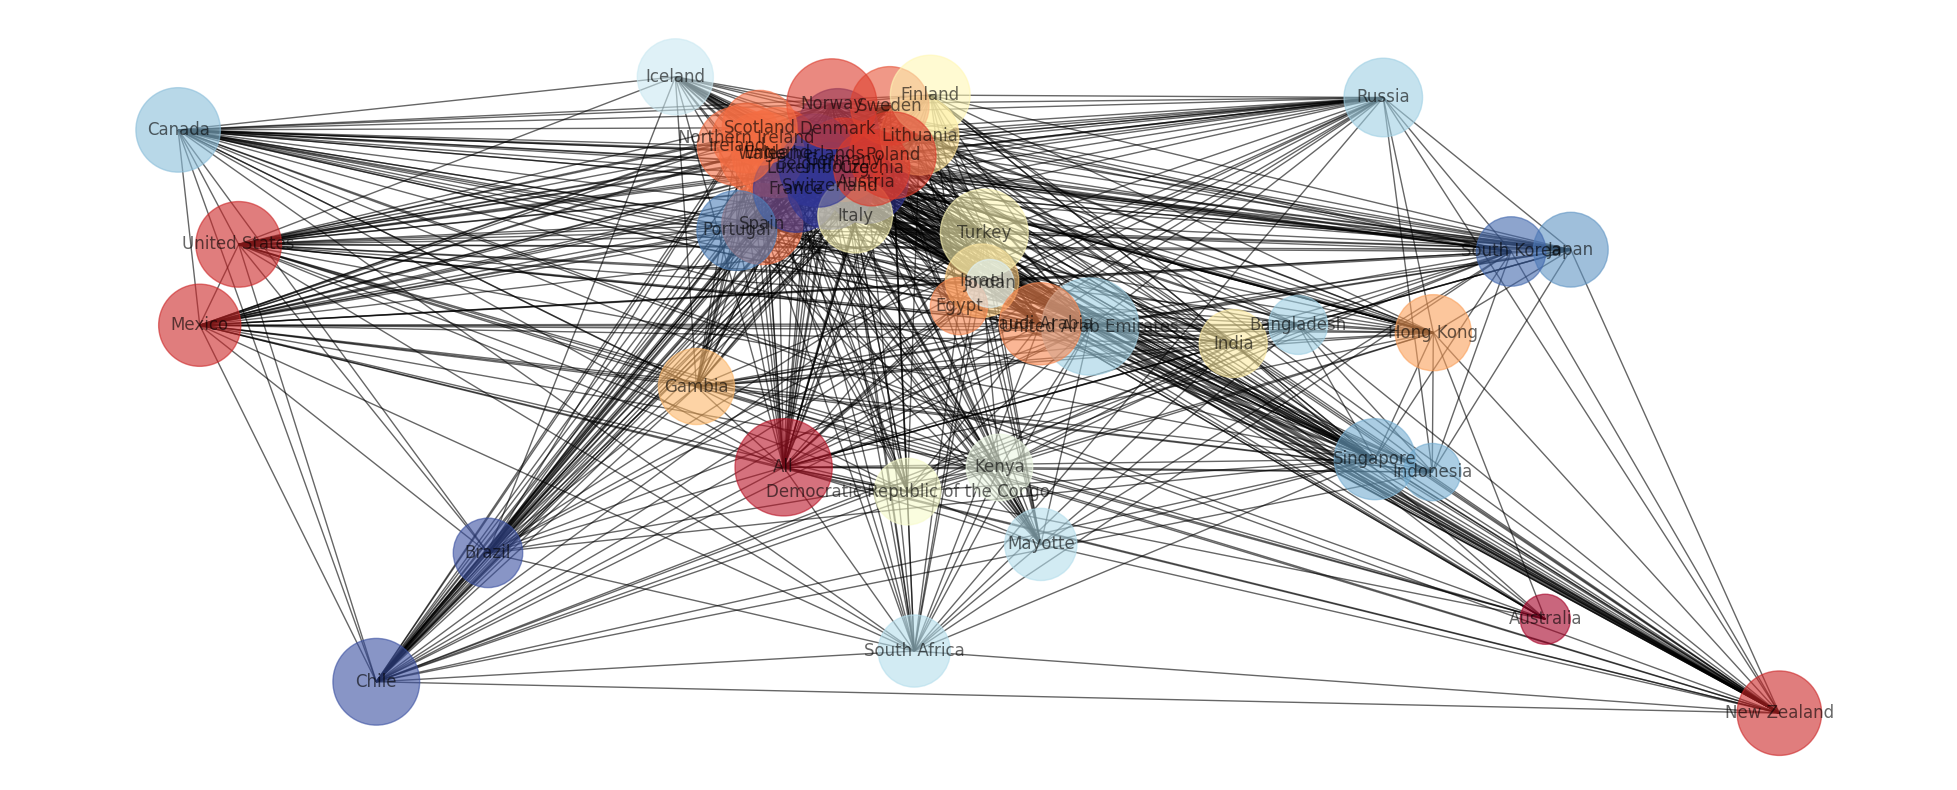

In [398]:
G_NN.remove_edges_from(nx.selfloop_edges(G_NN))


pos =region_geo

node_size=[100*i for i in list(dict(G_NN.degree()).values())]



plt.figure(figsize=(25, 10))  # image is 8 x 8 inches
plt.axis('off')
edges = G_NN.edges()   

weights = [G_NN[u][v]['weight'] for u,v in edges]

nx.draw(G_NN,node_size=node_size,with_labels=True,cmap=plt.cm.RdYlBu, node_color=list(partition.values()), pos=pos,alpha=0.6)

#plt.savefig('figures/MCC_NB/network_%s_SpatialTemporal_MCC_NB_threshold%d_sample_size%d_kmer%d.png'%(start_month+'---'+end_month,threshold,sample_size,kmer), frameon=False)

plt.show()

In [399]:
#uncolored_final=['DRC','Hong Kong','Mayotte','Czechia','North Macedonia','Wuhan']
#uncolored_final=['North Macedonia', 'Singapore','Hong Kong','Kenya','Peru','Canada','Bangladesh','Democratic Republic of the Congo']
#uncolored_final=['Mayotte','Colombia','Equatorial Guinea','Gambia','Ghana']

uncolored_final=[]

# Only colour communities with size > min_size

In [400]:
import matplotlib.cm as cm

# Define the colormap you want (e.g., 'tab20')
colormap_name = 'hsv'
cmap = cm.get_cmap(colormap_name)

# Calculate the number of unique communities
n_partitionn = len(set(community_dict_formatted_filtered_by_size.values()))

# Calculate colors based on the chosen colormap
num_colors = n_partitionn
color_list = [cmap(community / num_colors) for community in list(community_dict_formatted_filtered_by_size.values())]

# Create a scheme mapping regions to colors
scheme = dict(zip(list(community_dict_formatted_filtered_by_size.keys()), color_list))

# Print the number of colors
print(num_colors)


6


In [401]:
color_list = [cmap(community / num_colors) for community in list(community_dict_formatted_filtered_by_size.values())]


/tmp/ipykernel_261532/1518476351.py:42: MatplotlibDeprecationWarning: Passing the closed parameter of __init__() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.
  patches = [Polygon(np.array(shape), True)]
/tmp/ipykernel_261532/1518476351.py:89: MatplotlibDeprecationWarning: Passing the closed parameter of __init__() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.
  patches = [Polygon(np.array(shape), True)]
/tmp/ipykernel_261532/1518476351.py:150: MatplotlibDeprecationWarning: Passing the closed parameter of __init__() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.
  patches = [Polygon(np.array(shape), True)]
/tmp/ipykernel_261532/1518476351.py:169: MatplotlibDeprecationWarning: Passing the closed parameter of __init__() positionally is deprecated since Matplotlib 3.6; the parameter will b

figures/MCC_NB/2020-07---2021-05_SpatialTemporal_MCC_NB_cv5fold_threshold300_sample_size300_kmer100.png
uncolored ['Scotland', 'Wales', 'England', 'Northern Ireland']


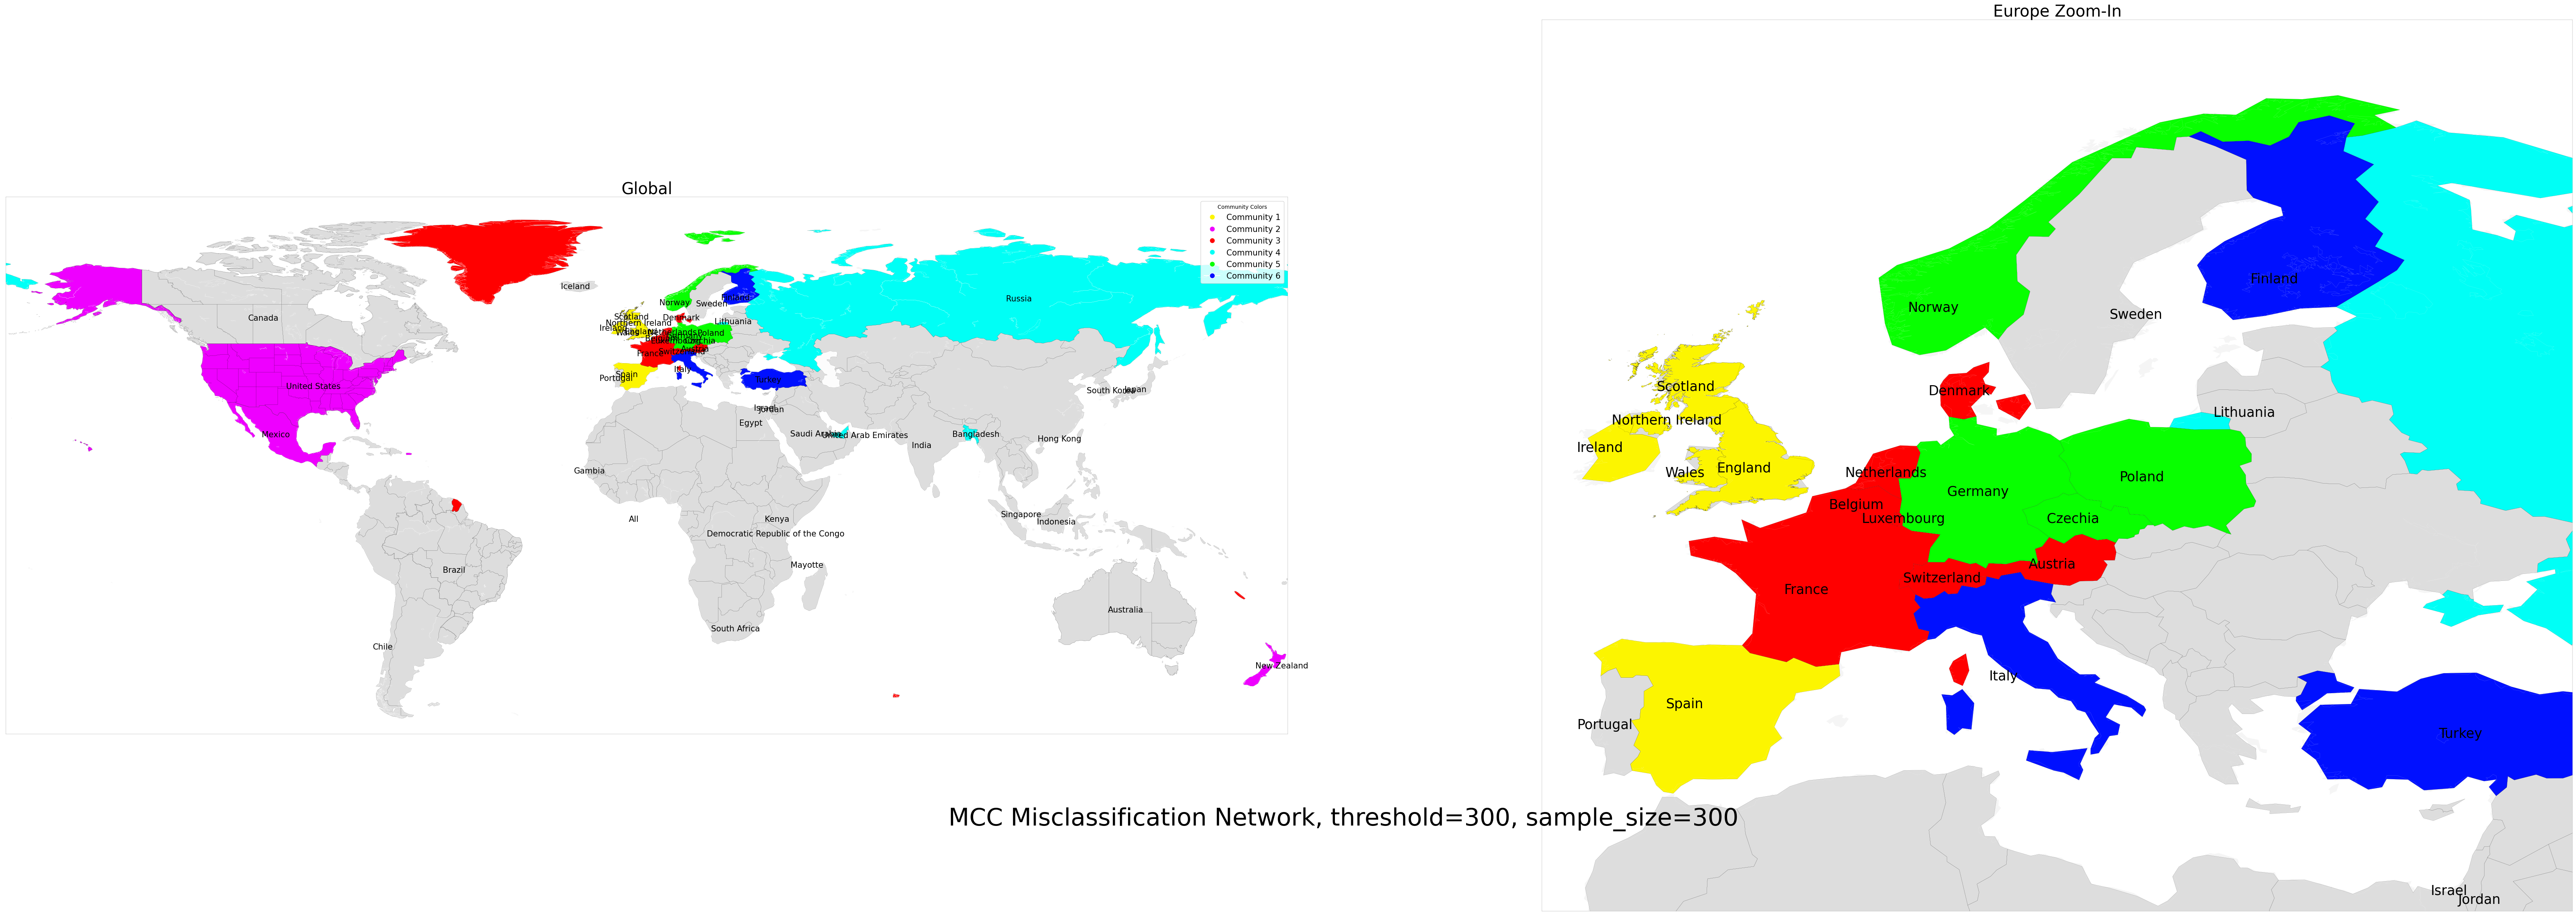

In [405]:
from matplotlib.patches import Patch
from matplotlib.lines import Line2D  # Import Line2D class for legend markers

#bins = np.linspace(1, 29, num_colors)



fig = plt.figure(num=None, figsize=(90, 30) ) 
spec = gridspec.GridSpec(ncols=2, nrows=1,width_ratios=[1, 1], wspace=0.1,hspace=0.1, height_ratios=[1])
 



ax1 = fig.add_subplot(spec[0], facecolor='w', frame_on=True )
ax1.set_title('Global',fontsize=30)


# map 1: sovereignty level 

m=Basemap(llcrnrlon=-179, llcrnrlat=-60, urcrnrlon=179, urcrnrlat=90, resolution='l')
m.drawmapboundary(fill_color='white', linewidth=0.1)
m.fillcontinents(color='#f2f2f2', alpha=0.7)
m.drawcoastlines(linewidth=0.1, color="white")
m.readshapefile('data/ne_110m_admin_0_sovereignty/ne_110m_admin_0_sovereignty', name='units', linewidth=0.1)



colored_region=[]
        


for info, shape in zip(m.units_info, m.units):
    name_en = info['SUBUNIT']
    if name_en not in regions_community_filtered_by_size:
        color = '#dddddd'
    #elif name_en in regions_filtered_out:
    #    color = '#6c757d'
    else:
        color = scheme[name_en]
        colored_region.append(name_en)

    patches = [Polygon(np.array(shape), True)]
    pc = PatchCollection(patches)
    pc.set_facecolor(color)
    ax1.add_collection(pc)
    

# map 2: states_provinces level

m=Basemap(llcrnrlon=-179, llcrnrlat=-60, urcrnrlon=179, urcrnrlat=90, resolution='l')
m.drawmapboundary(fill_color='white', linewidth=0.1)
#m.fillcontinents(color='#f2f2f2', alpha=0.7)
m.drawcoastlines(linewidth=0.1, color="white")
m.readshapefile('data/ne_50m_admin_1_states_provinces/ne_50m_admin_1_states_provinces', name='units', linewidth=0.1)
 


uncolored=list(set(regions_community_filtered_by_size)-set(colored_region))      

for info, shape in zip(m.units_info, m.units):
    name_en = info['name_en']
    if name_en in uncolored:
        color = scheme[name_en]
        patches = [Polygon(np.array(shape), True)]
        pc = PatchCollection(patches)
        pc.set_facecolor(color)
        ax1.add_collection(pc)








# map 3: UK country level



m=Basemap(llcrnrlon=-179, llcrnrlat=-60, urcrnrlon=179, urcrnrlat=90, resolution='l')

m.drawmapboundary(fill_color='white', linewidth=0.1)
m.readshapefile('data/GBR_adm/GBR_adm1', name='units', linewidth=0.1)

for info, shape in zip(m.units_info, m.units):
    name_en = info['NAME_1']
    if name_en in list(set(uncolored) & set(['Wales','Scotland','England','Northern Ireland'])):
        color = scheme[name_en]
        patches = [Polygon(np.array(shape), True)]
        pc = PatchCollection(patches)
        pc.set_facecolor(color)
        ax1.add_collection(pc)

    


for i in formatted_regions:
        plt.annotate(i, xy=m(region_geo[i][0]-5, region_geo[i][1]), size=15,verticalalignment='center')


for i in uncolored_final:
    ax1.plot(m(region_geo[i][0],region_geo[i][1])[0],m(region_geo[i][0],region_geo[i][1])[1], color = scheme[i], marker="o", markersize=20)


# Create a scheme mapping communities to colors
community_color_mapping = {community: color for community, color in enumerate(list(set(color_list)), start=1)}

# Create a simplified legend for the color scheme
legend_elements = [plt.Line2D([0], [0], marker='o', color='w', label=f"Community {community}",
                              markerfacecolor=color, markersize=10)
                   for community, color in community_color_mapping.items()]
ax1.legend(handles=legend_elements, title="Community Colors", loc='upper right', fontsize=15)
    

#---------------------------------------------------------------------------------------------------------------------------------------------------------

ax2 = fig.add_subplot(122, facecolor='w', frame_on=True)

ax2.set_title('Europe Zoom-In',fontsize=30) 




description = 'Europe'


# Start a new plot: soverighty level europe zoom-in



m2=Basemap(llcrnrlon=-12, llcrnrlat=30, urcrnrlon=40, urcrnrlat=75, resolution='l')
#m2=Basemap(llcrnrlon=-50, llcrnrlat=-60, urcrnrlon=179, urcrnrlat=90, resolution='l')
m2.drawmapboundary(fill_color='white', linewidth=0.1)
m2.fillcontinents(color='#f2f2f2', alpha=0.7)
m2.drawcoastlines(linewidth=0.1, color="white")
m2.readshapefile('data/ne_110m_admin_0_sovereignty/ne_110m_admin_0_sovereignty', name='units', linewidth=0.1)





for info, shape in zip(m2.units_info, m2.units):
    name_en = info['SUBUNIT']
    if name_en not in regions_community_filtered_by_size:
        color = '#dddddd'
    else:
        color = scheme[name_en]


    patches = [Polygon(np.array(shape), True)]
    pc = PatchCollection(patches)
    pc.set_facecolor(color)
    ax2.add_collection(pc)

    
# map 3: UK country level



m2=Basemap(llcrnrlon=-12, llcrnrlat=30, urcrnrlon=40, urcrnrlat=75, resolution='l')
#m2=Basemap(llcrnrlon=-50, llcrnrlat=-60, urcrnrlon=179, urcrnrlat=90, resolution='l')
m2.drawmapboundary(fill_color='white', linewidth=0.1)
m2.readshapefile('data/GBR_adm/GBR_adm1', name='units', linewidth=0.1)

for info, shape in zip(m2.units_info, m2.units):
    name_en = info['NAME_1']
    if name_en in list(set(uncolored) & set(['Wales','Scotland','England','Northern Ireland'])):
        color = scheme[name_en]
        patches = [Polygon(np.array(shape), True)]
        pc = PatchCollection(patches)
        pc.set_facecolor(color)
        ax2.add_collection(pc)

for i in uncolored_final:
    ax2.plot(m2(region_geo[i][0],region_geo[i][1])[0],m2(region_geo[i][0],region_geo[i][1])[1], color = scheme[i], marker="o", markersize=30)


for i in formatted_regions:
    plt.annotate(i, xy=m2(region_geo[i][0]-2, region_geo[i][1]), size=25,verticalalignment='center')




state = np.random.RandomState(51423)


fig.suptitle('MCC Misclassification Network, threshold=%d, sample_size=%d'%(threshold,sample_size),x=0.51,y=0.2,fontsize=45)
    
    
m4 = ax1.pcolormesh(state.rand(0, 0),cmap=cmap)

path='figures/MCC_NB/%s_SpatialTemporal_MCC_NB_cv5fold_threshold%d_sample_size%d_kmer%d.png'%(start_month+'---'+end_month,threshold,sample_size,kmer)
print(path)
plt.savefig(path)
#plt.savefig('figures/MCC_NB/Spatial_MCC_NB_cv5fold_threshold%d_sample_size%d_kmer%d.png'%(threshold,sample_size,kmer))

plt.show



print('uncolored',uncolored)

# Compare with a configuration preserving weight sequences

In [354]:
#shuffle node degree
#preserving degree distribution
deg_seq=[d for n, d in G_NN.degree()]
for i in range(100):
    random.shuffle(deg_seq)
seed=1
G_config=nx.configuration_model(deg_seq, seed=seed)

weights = [G_NN[u][v]['weight'] for u,v in G_NN.edges() ]
for i in range(100):
    random.shuffle(weights)
mapping=dict(zip(list(range(len(formatted_regions))),formatted_regions))

G_config = nx.relabel_nodes(G_config, mapping)

for (source,target) in G_config.edges():
    G_config[source][target][0]['weight']=weights[i]



In [355]:
len(G_config.edges())==len(G_NN.edges())

True

In [356]:
permuted_partition = community_louvain.best_partition(G_config, weight='weight')


permuted_community_dict_formatted=dict(zip(formatted_regions,list(permuted_partition.values())))

In [ ]:
community_grouped = defaultdict(list)
for key, val in sorted(permuted_community_dict_formatted.items()):
    community_grouped[val].append(key)

n_communities=len(set(permuted_community_dict_formatted.values()))
communities_sorted_bysize=dict(enumerate(sorted(list(community_grouped.values()), key=len,reverse=True)))

communities_size_geq_2=[k for (k,v) in list(communities_sorted_bysize.items()) if len(v)>1]

regions_community_size_geq_2=[v for (k,v) in list(communities_sorted_bysize.items()) if len(v)>1]
regions_community_size_geq_2=sum(regions_community_size_geq_2,[])

geq2_community_dict_formatted={region_i:community_id for (community_id,members_c) in list(communities_sorted_bysize.items()) for region_i in members_c if len(members_c)>1}


In [358]:
cmap = cm.get_cmap('hsv')

n_partitionn=len(set(geq2_community_dict_formatted.values()))

num_colors=n_partitionn
color_list=[cmap(community / num_colors) for community in list(geq2_community_dict_formatted.values())]
scheme=dict(zip(list(geq2_community_dict_formatted.keys()),color_list))


/shared/centos7/anaconda3/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:196: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "frameon" which is no longer supported as of 3.3 and will become an error in 3.6


<function matplotlib.pyplot.show(close=None, block=None)>

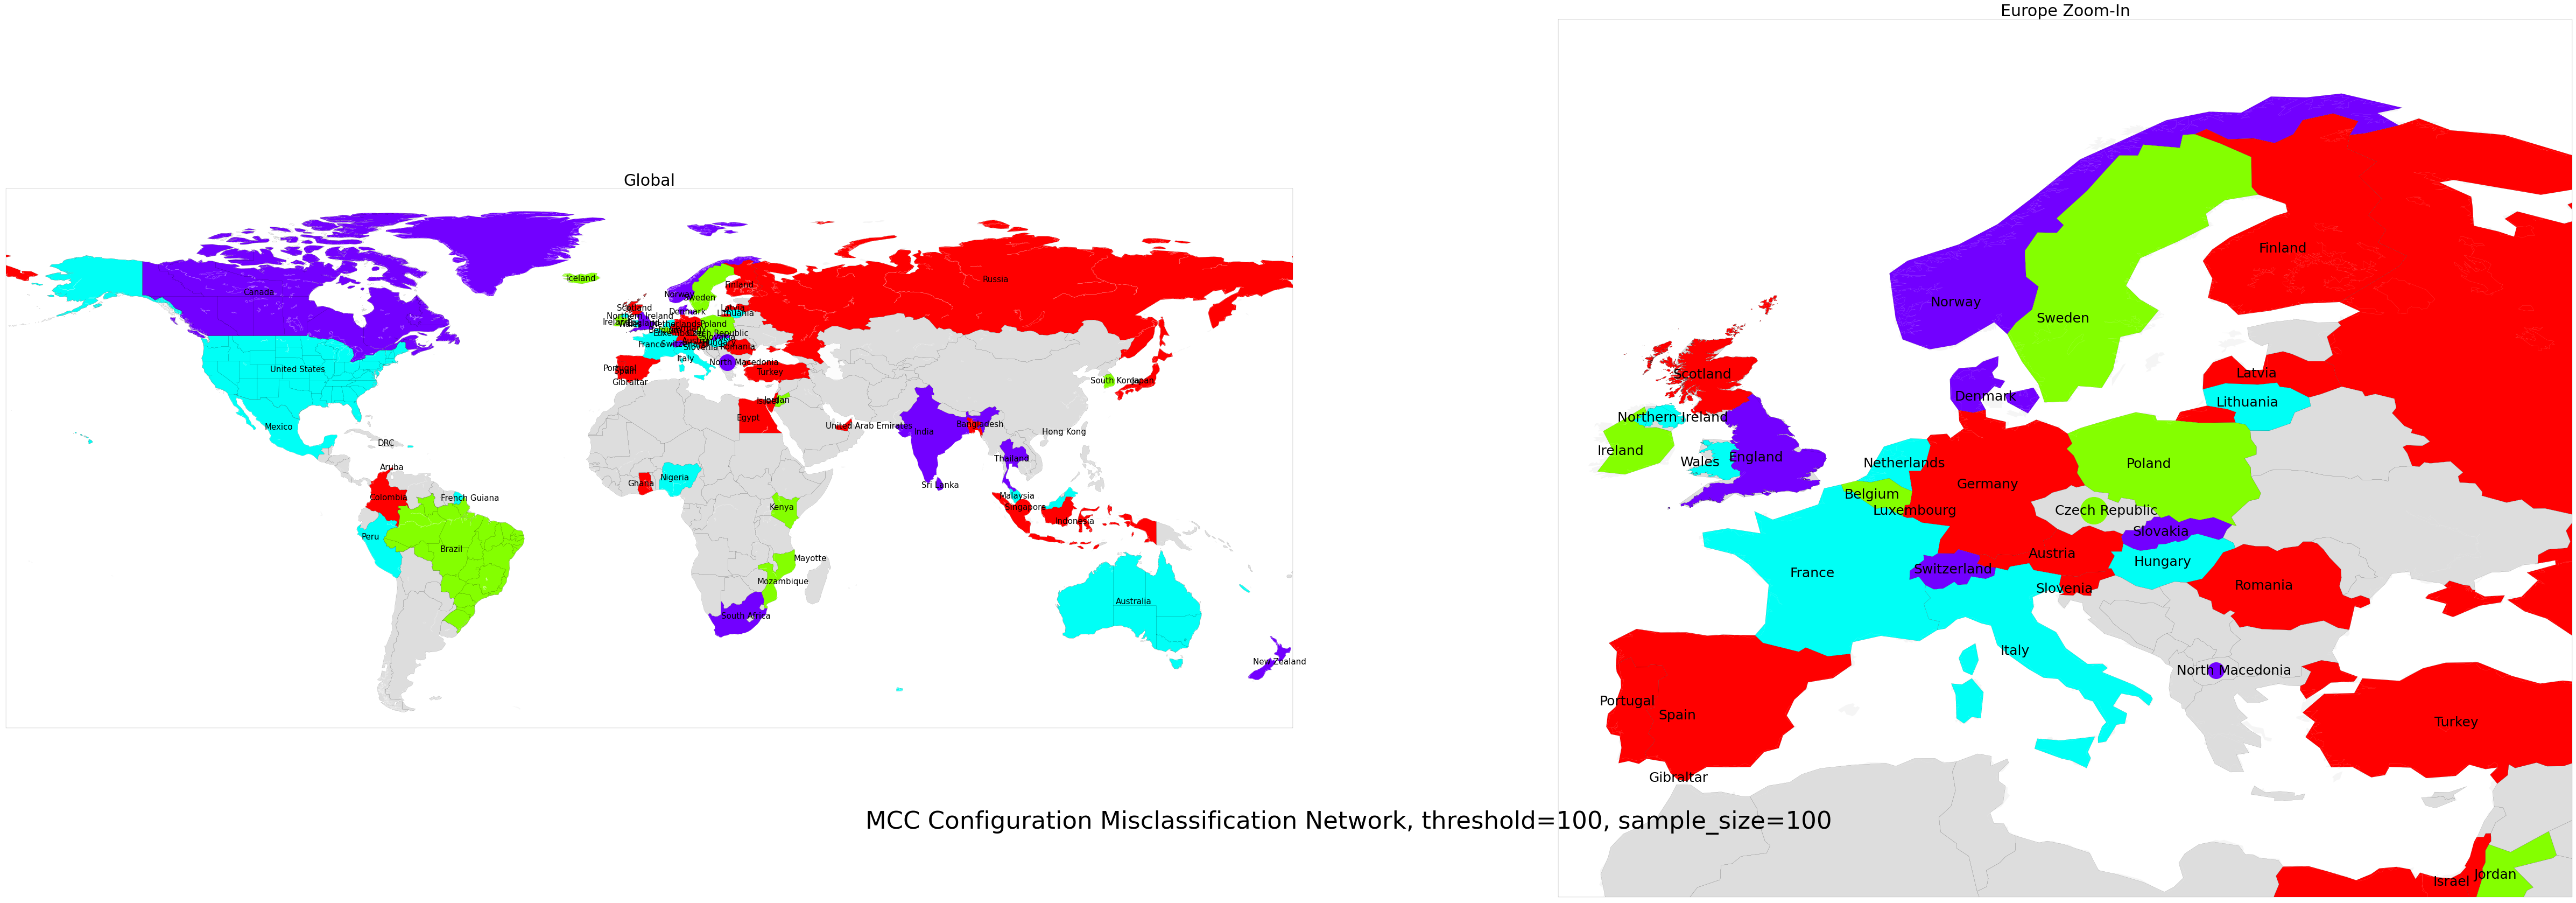

In [359]:
#new version




fig = plt.figure(num=None, figsize=(90, 30) ) 
spec = gridspec.GridSpec(ncols=2, nrows=1,width_ratios=[1, 1], wspace=0.1,hspace=0.1, height_ratios=[1])
 



ax1 = fig.add_subplot(spec[0], facecolor='w', frame_on=True )
ax1.set_title('Global',fontsize=30)


# map 1: sovereignty level 

m=Basemap(llcrnrlon=-179, llcrnrlat=-60, urcrnrlon=179, urcrnrlat=90, resolution='l')
m.drawmapboundary(fill_color='white', linewidth=0.1)
m.fillcontinents(color='#f2f2f2', alpha=0.7)
m.drawcoastlines(linewidth=0.1, color="white")
m.readshapefile('data/ne_110m_admin_0_sovereignty/ne_110m_admin_0_sovereignty', name='units', linewidth=0.1)



colored_region=[]
        


for info, shape in zip(m.units_info, m.units):
    name_en = info['SUBUNIT']
    if name_en not in regions_community_size_geq_2:
        color = '#dddddd'

    else:
        color = scheme[name_en]
        colored_region.append(name_en)

    patches = [Polygon(np.array(shape), True)]
    pc = PatchCollection(patches)
    pc.set_facecolor(color)
    ax1.add_collection(pc)
    

# map 2: states_provinces level

m=Basemap(llcrnrlon=-179, llcrnrlat=-60, urcrnrlon=179, urcrnrlat=90, resolution='l')
m.drawmapboundary(fill_color='white', linewidth=0.1)
#m.fillcontinents(color='#f2f2f2', alpha=0.7)
m.drawcoastlines(linewidth=0.1, color="white")
m.readshapefile('data/ne_50m_admin_1_states_provinces/ne_50m_admin_1_states_provinces', name='units', linewidth=0.1)
 


uncolored=list(set(regions_community_size_geq_2)-set(colored_region))      


for info, shape in zip(m.units_info, m.units):
    name_en = info['name_en']
    if name_en in uncolored:
        color = scheme[name_en]
        patches = [Polygon(np.array(shape), True)]
        pc = PatchCollection(patches)
        pc.set_facecolor(color)
        ax1.add_collection(pc)








# map 3: UK country level



m=Basemap(llcrnrlon=-179, llcrnrlat=-60, urcrnrlon=179, urcrnrlat=90, resolution='l')

m.drawmapboundary(fill_color='white', linewidth=0.1)
m.readshapefile('data/GBR_adm/GBR_adm1', name='units', linewidth=0.1)

for info, shape in zip(m.units_info, m.units):
    name_en = info['NAME_1']
    if name_en in list(set(uncolored) & set(['Wales','Scotland','England','Northern Ireland'])):
        color = scheme[name_en]
        patches = [Polygon(np.array(shape), True)]
        pc = PatchCollection(patches)
        pc.set_facecolor(color)
        ax1.add_collection(pc)

    


for i in formatted_regions:
        plt.annotate(i, xy=m(region_geo[i][0]-5, region_geo[i][1]), size=15,verticalalignment='center')


for i in uncolored_final:
    ax1.plot(m(region_geo[i][0],region_geo[i][1])[0],m(region_geo[i][0],region_geo[i][1])[1], color = scheme[i], marker="o", markersize=30)


    






#---------------------------------------------------------------------------------------------------------------------------------------------------------

ax2 = fig.add_subplot(122, facecolor='w', frame_on=True)

ax2.set_title('Europe Zoom-In',fontsize=30) 





description = 'Europe'


# Start a new plot: soverighty level europe zoom-in



m2=Basemap(llcrnrlon=-12, llcrnrlat=30, urcrnrlon=40, urcrnrlat=75, resolution='l')
#m2=Basemap(llcrnrlon=-50, llcrnrlat=-60, urcrnrlon=179, urcrnrlat=90, resolution='l')
m2.drawmapboundary(fill_color='white', linewidth=0.1)
m2.fillcontinents(color='#f2f2f2', alpha=0.7)
m2.drawcoastlines(linewidth=0.1, color="white")
m2.readshapefile('data/ne_110m_admin_0_sovereignty/ne_110m_admin_0_sovereignty', name='units', linewidth=0.1)





for info, shape in zip(m2.units_info, m2.units):
    name_en = info['SUBUNIT']
    if name_en not in regions_community_size_geq_2:
        color = '#dddddd'

        
    else:
        color = scheme[name_en]


    patches = [Polygon(np.array(shape), True)]
    pc = PatchCollection(patches)
    pc.set_facecolor(color)
    ax2.add_collection(pc)

    
# map 3: UK country level



m2=Basemap(llcrnrlon=-12, llcrnrlat=30, urcrnrlon=40, urcrnrlat=75, resolution='l')
#m2=Basemap(llcrnrlon=-50, llcrnrlat=-60, urcrnrlon=179, urcrnrlat=90, resolution='l')
m2.drawmapboundary(fill_color='white', linewidth=0.1)
m2.readshapefile('data/GBR_adm/GBR_adm1', name='units', linewidth=0.1)

for info, shape in zip(m2.units_info, m2.units):
    name_en = info['NAME_1']
    if name_en in list(set(uncolored) & set(['Wales','Scotland','England','Northern Ireland'])):
        color = scheme[name_en]
        patches = [Polygon(np.array(shape), True)]
        pc = PatchCollection(patches)
        pc.set_facecolor(color)
        ax2.add_collection(pc)

    
    

for i in formatted_regions:  # including communities of size 1
        plt.annotate(i, xy=m2(region_geo[i][0]-2, region_geo[i][1]), size=25,verticalalignment='center')



for i in uncolored_final:
    ax2.plot(m2(region_geo[i][0],region_geo[i][1])[0],m2(region_geo[i][0],region_geo[i][1])[1], color = scheme[i], marker="o", markersize=30)

    
if 'Czech Republic' in uncolored_final:    
    ax2.plot(m2(region_geo['Czech Republic'][0],region_geo['Czech Republic'][1])[0],m2(region_geo['Czech Republic'][0],region_geo['Czech Republic'][1])[1], color = scheme['Czech Republic'], marker="o", markersize=50)

        
state = np.random.RandomState(51423)


fig.suptitle('MCC Configuration Misclassification Network, threshold=%d, sample_size=%d'%(threshold,sample_size),x=0.51,y=0.2,fontsize=45)
    
    


#plt.savefig('figures/MCC_NB/Configuration_Permuted_%s_SpatialTemporal_MCC_NB_cv5fold_threshold%d_sample_size%d_kmer%d.png'%(start_month+'---'+end_month,threshold,sample_size,kmer), frameon=False)

plt.show



